# Assignment 2 submitted by (Group 21):

 * Jake Schmidt
 * Bhavana Vijay
 * Jianjie Zheng

# NYC Restaurants

Using the data uploaded on canvas, we analysed restaurant inspections in New York City for the period starting 1st November, 2014 and ending 31st January, 2015. 

Below are our answers to the questions in the assignment. Doc strings and steps inline to explain the approach.

In [1]:
#Setup

from pandas import Series, DataFrame
import pandas as pd
%pylab inline

df = pd.read_csv('NYC_Restaurants.csv',dtype=unicode)

Populating the interactive namespace from numpy and matplotlib


## [Q1] Create a unique name for each restaurant

In [2]:
#Q1

#Creating a new column in the existing data frame
df['RESTAURANT'] = df['DBA']+" "+df['BUILDING']+" "+df['STREET']+" "+df['ZIPCODE']
df['RESTAURANT'][:10] #A snapshot of first 10 values

0                    WENDY'S 469 FLATBUSH AVENUE 11225
1                    WENDY'S 469 FLATBUSH AVENUE 11225
2                    WENDY'S 469 FLATBUSH AVENUE 11225
3                    WENDY'S 469 FLATBUSH AVENUE 11225
4                    WENDY'S 469 FLATBUSH AVENUE 11225
5               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
6               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
7               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
8               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

## [Q2] How many restaurants are included in the data?

In [5]:
#Q2

#Using the unique function to get unique restaurant values
Restaurant = df['RESTAURANT'].unique()
print "There are "+str(len(Restaurant))+" restaurants included in the data"

There are 10114 restaurants included in the data


## [Q3] How many chains are there?

In [7]:
#Q3

#Creating a new DataFrame from exisiting with columns Restaurant, DBA and Boro and dropping duplicates
Chains = df[['RESTAURANT','DBA','BORO']].drop_duplicates()
chains_mask = Chains['DBA'].value_counts()>1 #Applying the condition specified in the question
#Using the mask where num of same DBA restaurant >1
Chains_2 = Chains['DBA'].value_counts()[chains_mask]

print "Total number of unique DBAs that are chains: "+str(len(Chains_2))
print "Total number of chain Restaurants: "+str(sum(Chains_2))

Total number of unique DBAs that are chains: 368
Total number of chain Restaurants: 1666


## [Q4] Plot a bar graph of the top 20 most popular chains.

Number of Chains in each Restaurant: (Top 20)


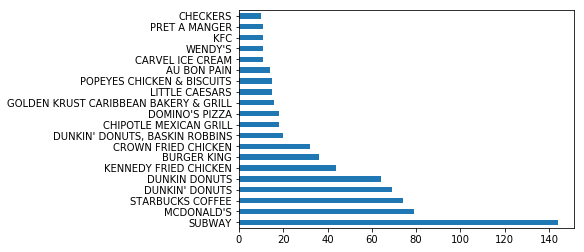

In [11]:
#Q4

#Plotting the top 20 of the above created Series
Chains_2[:20].plot.barh()
print "Number of Chains in each Restaurant: (Top 20)"
#print Chains_2[:20]

## [Q5] What fraction of all restaurants are chains?

In [14]:
#Q5

num = sum(Chains_2) #Numerator is the sum of the value counts series created above
den= len(Chains) #Denominator is the total number of restaurants
print "Fraction of Restaurants that are chains: "+str(round((float(num)/den),4)*100)+"%"
print "Total number of chain Restaurants (Numerator): "+str(num)
print "Total number of Restaurants (Denominator): "+str(den)


Fraction of Restaurants that are chains: 16.47%
Total number of chain Restaurants (Numerator): 1666
Total number of Restaurants (Denominator): 10114


## [Q6] Plot the number of non-chain restaurants in each Boro

MANHATTAN        3323
BROOKLYN         2180
QUEENS           1968
BRONX             659
STATEN ISLAND     312
Name: BORO, dtype: int64


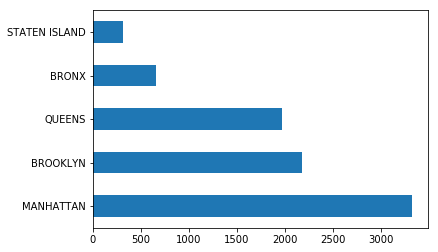

In [21]:
#Q6

#Firstly removing the rows where Boro has "Missing" values
missing_mask=Chains['BORO'] =='Missing'
Chains.loc[missing_mask, 'BORO'] = np.nan

#Series with names of the Non Chain Restaurant
Non_Chains=Chains['DBA'].value_counts()[Chains['DBA'].value_counts()==1]

#Create a mask using isin() which creates a boolean series of whether Series1 has Series2
mask1=Chains['DBA'].isin(DataFrame(Non_Chains).index)

#Using the mask we created getting the "True" rows and doing value counts on Boros
Non_Chain_Boro = Chains[mask1]['BORO'].value_counts()

#Plotting non chain restaurants per Boro
Non_Chain_Boro.plot.barh()
print Non_Chain_Boro

## [Q7] Plot the fraction of non-chain restaurants in each Boro

MANHATTAN        0.830542
BROOKLYN         0.862001
QUEENS           0.847910
BRONX            0.770760
STATEN ISLAND    0.791878
Name: BORO, dtype: float64


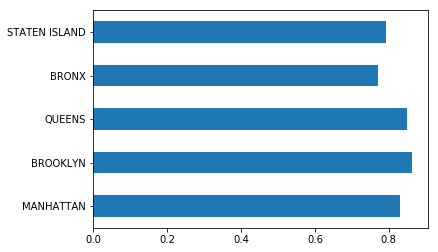

In [17]:
#Q7

Total_Restaurants_Boro = Chains['BORO'].value_counts()

Fraction_Independent = Non_Chain_Boro/Total_Restaurants_Boro #Dividing the two series

Fraction_Independent.plot.barh()

print Fraction_Independent
#We notice that while Manhattan has the most independent restaurants, 
#Brooklyn has the highest % of independent restaurants

## [Q8] Plot the popularity of cuisines

Top 20 Cuisines among all restaurants:


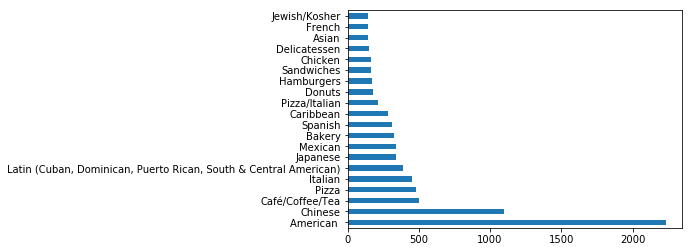

In [20]:
#Q8

#Creating a new DataFrame and dropping duplicate rows for Restaurant vs Cuisine data
Cuisines = df[['RESTAURANT','DBA','BORO','CUISINE DESCRIPTION']].drop_duplicates()

Cuisines['CUISINE DESCRIPTION'].value_counts()[:20].plot.barh()
print "Top 20 Cuisines among all restaurants:"

## [Q9] Plot the cuisines among restaurants which NEVER got cited for violations

241
American                                                            49
Chinese                                                             42
Café/Coffee/Tea                                                     14
Pizza                                                               11
Italian                                                             10
Latin (Cuban, Dominican, Puerto Rican, South & Central American)    10
Spanish                                                              8
Japanese                                                             8
Bakery                                                               7
Other                                                                6
Asian                                                                6
Donuts                                                               5
Delicatessen                                                         5
French                                                               4
Th

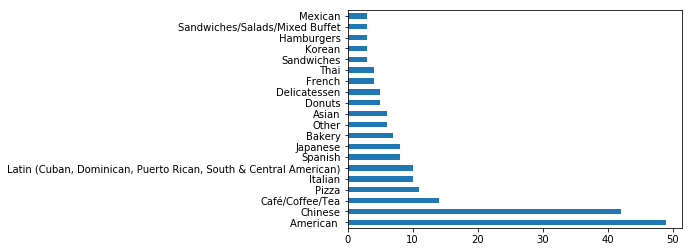

In [27]:
#Q9

#Creating a new DataFrame with required fields
Cuisines_V = df[['RESTAURANT','CUISINE DESCRIPTION','VIOLATION CODE']]

#Using the isnull() getting the data frame values of all the empty Violation Code rows
Clean = Cuisines_V[Cuisines_V['VIOLATION CODE'].isnull()]
#Using the notnull() getting the data frame values of all the rows with violations
Dirty = Cuisines_V[Cuisines_V['VIOLATION CODE'].notnull()]

#Creating a new Series with Restaurants that have NEVER gotten a Violation
Always_Clean = Clean[~Clean['RESTAURANT'].isin(Dirty['RESTAURANT'])][['RESTAURANT','CUISINE DESCRIPTION']].drop_duplicates()

Always_Clean['CUISINE DESCRIPTION'].value_counts()[:20].plot.barh()
print Always_Clean['CUISINE DESCRIPTION'].value_counts()[:20]

## [Q10] What cuisines tend to be the "cleanest"?
### Ratio of passed inspections to total inspections

Ratio of Inspections that passed in Cuisines that have greater than 20 Restaurants: (Top 10)
Soul Food                        0.090909
Vietnamese/Cambodian/Malaysia    0.062500
Other                            0.058252
Soups & Sandwiches               0.047619
Continental                      0.047619
Barbecue                         0.047619
Asian                            0.041096
Chinese                          0.038251
Greek                            0.036364
Peruvian                         0.035714
Name: CUISINE DESCRIPTION, dtype: float64


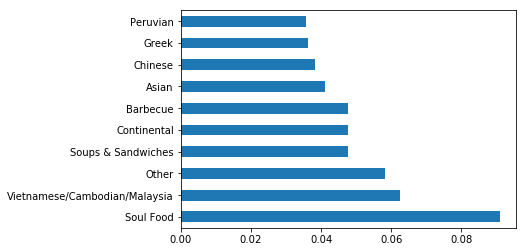

In [30]:
#Q10
Cuisines_Rest = df[['RESTAURANT','CUISINE DESCRIPTION']].drop_duplicates(subset='RESTAURANT')

#DF of cuisines and restaurants where atleast 20 restaurants are present for each cuisine
Cuis_20=Cuisines_Rest['CUISINE DESCRIPTION'].value_counts()[Cuisines_Rest['CUISINE DESCRIPTION'].value_counts()>=20]

#Create a mask using isin() which creates a boolean series of whether Series1 has Series2
Cuis_20_All=Cuisines_V[Cuisines_V['CUISINE DESCRIPTION'].isin(DataFrame(Cuis_20).index)]

Clean2 = Cuis_20_All[Cuis_20_All['VIOLATION CODE'].isnull()]
Dirty2 = Cuis_20_All[Cuis_20_All['VIOLATION CODE'].notnull()]

#Making a new Series of Always Clean for Cuisines in the 20 cut off
Always_Clean2 = Clean2[~Clean2['RESTAURANT'].isin(Dirty2['RESTAURANT'])][['RESTAURANT','CUISINE DESCRIPTION']].drop_duplicates(subset='RESTAURANT')
#Outer Merging the purely clean restaurants with the dirty set to get a full data frame of dirty+clean
Total = Dirty2[['RESTAURANT','CUISINE DESCRIPTION']].merge(Always_Clean2,how='outer').drop_duplicates()


Passed_Inspections= Always_Clean2['CUISINE DESCRIPTION'].value_counts()
All_Inspections= Total['CUISINE DESCRIPTION'].value_counts()

#Computing the ratio
Inspect_Ratio = Passed_Inspections/All_Inspections

Inspect_Ratio.sort_values(ascending=False)[:10].plot.barh()
print "Ratio of Inspections that passed in Cuisines that have greater than 20 Restaurants: (Top 10)"
print Inspect_Ratio.sort_values(ascending=False)[:10]

## [Q11] What are the most common violations in each Boro?

In [33]:
#Q11

#Making a copy of the DataFrame with only Boro and Violation
df_ct_copy = df[['VIOLATION DESCRIPTION','BORO']]

#Assigning NaN to the missing values rows in Boro
missing_mask2=df_ct_copy['BORO'] =='Missing'
df_ct_copy.loc[missing_mask2, 'BORO'] = np.nan

#Creating a crosstab with Violation description and Boro
df_ct = pd.crosstab(df_ct_copy['VIOLATION DESCRIPTION'],df_ct_copy['BORO'])
print "The most common Violation Description is:"

#Using idxmax function to get the maximum count in each Boro
print df_ct.idxmax()
df_ct


The most common Violation Description is:
BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object


C:\Users\bhava\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


BORO,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
VIOLATION DESCRIPTION,,,,,
"Choking first aid poster not posted. Alcohol and pregnancy warning sign not posted. Resuscitation equipment: exhaled air resuscitation masks (adult & pediatric), latex gloves, sign not posted. Inspection report sign not posted.",12,40,49,29,5
''''No Smoking and/or 'Smoking Permitted sign not conspicuously posted. Health warning not present on 'Smoking Permitted,1,5,6,4,1
''''Wash hands sign not posted at hand wash facility.,21,57,93,60,8
"A food containing artificial trans fat, with 0.5 grams or more of trans fat per serving, is being stored, distributed, held for service, used in preparation of a menu item, or served.",5,12,19,24,3
Accurate thermometer not provided in refrigerated or hot holding equipment.,21,76,98,92,16
"Appropriately scaled metal stem-type thermometer or thermocouple not provided or used to evaluate temperatures of potentially hazardous foods during cooking, cooling, reheating and holding.",27,120,162,85,17
Ashtray present in smoke-free area.,4,4,5,8,1
"Bulb not shielded or shatterproof, in areas where there is extreme heat, temperature changes, or where accidental contact may occur.",20,93,168,80,10
"Caloric content not posted on menus, menu boards or food tags, in a food service establishment that is 1 of 15 or more outlets operating the same type of business nationally under common ownership or control, or as a franchise or doing business under the same name, for each menu item that is served in portions, the size and content of which are standardized.",0,4,6,5,1


## [Q12] What are the most common violations per borough, after normalizing for the relative abundance of each violation?

In [34]:
#Q12

#Creating a series for Violation Frequency
violationFrequency = df['VIOLATION DESCRIPTION'].value_counts()

#Creating a function that divides each value with the Violation Frequency
def VF_Multiplier(counts):
    return counts/violationFrequency

#Using apply() with the function created
final = df_ct.apply(VF_Multiplier)

print "The most common Violation Description normalized with the total Violation Frequency is:"
#Using idxmax function to get the maximum
print final.idxmax()
final


The most common Violation Description normalized with the total Violation Frequency is:
BORO
BRONX                                  Unprotected food re-served.
BROOKLYN         Precooked potentially hazardous food from comm...
MANHATTAN        Out-of package sale of tobacco products observed.
QUEENS           Caloric content range (minimum to maximum) not...
STATEN ISLAND    Eggs found dirty/cracked; liquid, frozen or po...
dtype: object


BORO,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
"Choking first aid poster not posted. Alcohol and pregnancy warning sign not posted. Resuscitation equipment: exhaled air resuscitation masks (adult & pediatric), latex gloves, sign not posted. Inspection report sign not posted.",0.088889,0.296296,0.362963,0.214815,0.037037
''''No Smoking and/or 'Smoking Permitted sign not conspicuously posted. Health warning not present on 'Smoking Permitted,0.058824,0.294118,0.352941,0.235294,0.058824
''''Wash hands sign not posted at hand wash facility.,0.087500,0.237500,0.387500,0.250000,0.033333
"A food containing artificial trans fat, with 0.5 grams or more of trans fat per serving, is being stored, distributed, held for service, used in preparation of a menu item, or served.",0.079365,0.190476,0.301587,0.380952,0.047619
Accurate thermometer not provided in refrigerated or hot holding equipment.,0.069307,0.250825,0.323432,0.303630,0.052805
"Appropriately scaled metal stem-type thermometer or thermocouple not provided or used to evaluate temperatures of potentially hazardous foods during cooking, cooling, reheating and holding.",0.065693,0.291971,0.394161,0.206813,0.041363
Ashtray present in smoke-free area.,0.181818,0.181818,0.227273,0.363636,0.045455
"Bulb not shielded or shatterproof, in areas where there is extreme heat, temperature changes, or where accidental contact may occur.",0.053908,0.250674,0.452830,0.215633,0.026954
"Caloric content not posted on menus, menu boards or food tags, in a food service establishment that is 1 of 15 or more outlets operating the same type of business nationally under common ownership or control, or as a franchise or doing business under the same name, for each menu item that is served in portions, the size and content of which are standardized.",0.000000,0.250000,0.375000,0.312500,0.062500
"Caloric content range (minimum to maximum) not posted on menus and or menu boards for each flavor, variety and size of each menu item that is offered for sale in different flavors, varieties and sizes.",0.000000,0.000000,0.000000,1.000000,0.000000


## [Q13] How many phone area codes correspond to just a single zipcode?

In [36]:
#Q13

#Using string transformations to get the first 3 characters of the PHONE column
df['Phone_Area']= df['PHONE'].str[:3]

#Creating a new DF and dropping duplicate rows of Zip and Area code
df_Zip_Phone = df[['ZIPCODE','Phone_Area']].drop_duplicates()

#Creatinf a mask for area codes that have just one zipcode and then calculating the length of tht mask
mask_1 = df_Zip_Phone['Phone_Area'].value_counts() ==1
singe_zip_areas= len(df_Zip_Phone['Phone_Area'].value_counts()[mask_1])

print "Total number phone Area Codes that correspond to a SINGLE Zipcode are: "+ str(singe_zip_areas)
print 
print "How many area codes are within each Zipcode? (Top 20)"
print df_Zip_Phone['ZIPCODE'].value_counts()[:20]


Total number phone Area Codes that correspond to a SINGLE Zipcode are: 34

How many area codes are within each Zipcode? (Top 20)
10018    10
11201     8
10002     8
11430     8
10009     8
10003     7
11221     7
10014     7
10011     7
11211     7
11203     7
11206     7
10465     6
10016     6
11237     6
11229     6
11222     6
10012     6
11219     6
10001     6
Name: ZIPCODE, dtype: int64


## [Q14] Find common misspellings of street names
### Find the most common street type that occurs with each of the following: AVE, ST, RD, PL, BOULEARD and BULEVARD.

In [38]:
#Q14

#Using rsplit to split the STREET string into two parts as required
df['STREET TYPE'] = df['STREET'].str.rsplit(' ',1).str[1]
df['STREET BASE'] = df['STREET'].str.rsplit(' ',1).str[0]
df['STREET BASE & ZIP']= df['STREET BASE']+'+'+df['ZIPCODE']

#Creating a new DF with the three values
df_street = df[['STREET BASE & ZIP','STREET TYPE','STREET BASE']]

#Dropping duplicate values
df_street.drop_duplicates(inplace=True)
#Creating a mask for cases where Street base is not null
mask_not_null = df_street['STREET BASE'].notnull()

#New DF with required not null values
df_street_nn = df_street[mask_not_null]

#Merging the DF with itself and dropping duplicate rows
merged = df_street_nn.merge(df_street_nn,on='STREET BASE & ZIP')
merged.drop_duplicates(inplace=True)

#Finding the rows where different street types exist for the same zipcode and base
mask_diff = merged['STREET TYPE_x'] != merged['STREET TYPE_y']
merged_diff = merged[mask_diff]

#Creating a crosstab with the two different street types
diff_ct = pd.crosstab(merged_diff['STREET TYPE_x'],merged_diff['STREET TYPE_y'])

print "Common street type that occurs with the following: "
diff_ct.idxmax()[['AVE', 'ST', 'RD', 'PL', 'BOULEARD','BULEVARD']]

Common street type that occurs with the following: 


C:\Users\bhava\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


STREET TYPE_y
AVE         AVENUE
ST          STREET
RD            ROAD
PL           PLACE
BOULEARD      BLVD
BULEVARD      BLVD
dtype: object